# Projet Machine learning sur le dataset wine

lien du notebook:
[HUPI - Notebook wine étude de cas ](https://colab.research.google.com/drive/11rKAiGBvqQweuPpKEXfxSVj2YJEB9o_J?usp=sharing)

Dans ce notebook nous allons faire une étude sur le dataset **wine** qui a pour objectif de prédire la qualité du **vin**.

Pour vous donnner une idée générale de ce projet, nous mettons à votre dispostion la figure ci-dessous qui récapitule le processus et les démarches à travers lesquelles ce projet a été pensé et réalisé.

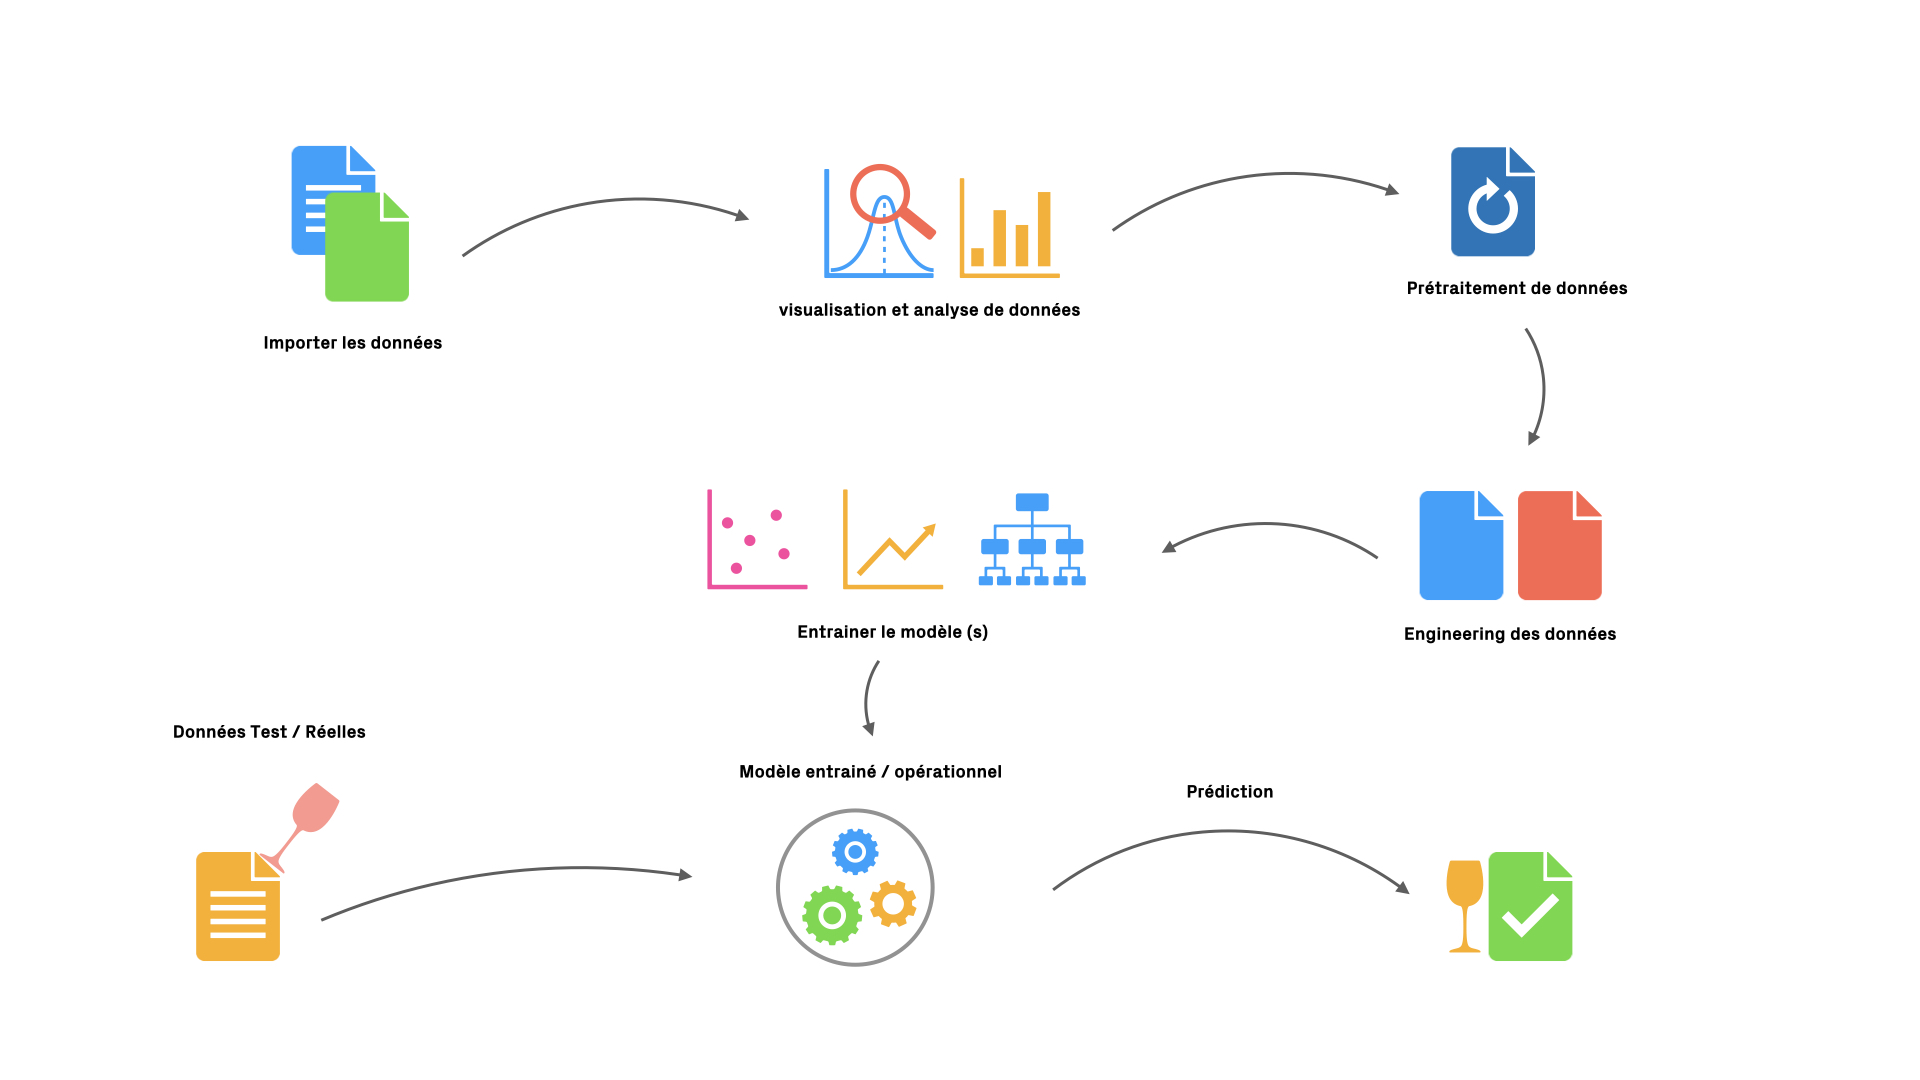

# Colab & Drive

Se connecter à Google Drive pour avoir accès au fichier **wine.csv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%ls

PS: Pour pouvoir faire tourner ce notebook il vous faudra uploader le même fichier **wine.csv** sur votre espace drive et naviguer dans le dossier qui le contient.

# Charger les Librairies nécessaires 

In [ ]:
import numpy as np  # pour 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Preprocess and load data

### 1.1 - Charger le Dataset (wine)

In [ ]:
data = pd.read_csv("wine.csv") # importer le dataset 

le dataset est composé de 1599 **Observations** (lignes) et 12 **Var(s)** (colonnes)

In [ ]:
data.shape # les dimenssions du dataset

(1599, 12)

**describe()** affiche quelques mesures statistiques comme la moyenne l'ecart type, la valeur min et max ....
Cela peut nous etre util si par exemple le dataset contient des valeurs nulles, une des méthode pour traiter ce cas est d'utiliser la moyenne, calculé et affiché ci-dessous.

In [ ]:
data.describe() # afficher les mesures statistiques du dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.head() # afficher les 5 premieres lignes du dataset pour voir à quoi resemeble et contient ce dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1.2 - Les Valeurs nulles

il est important de vérifier (généralement c'est le cas) l'existance de valeurs nulles (manquantes) et les gérer afin d'éviter tout effet significatif sur l'inférence, les performances de prédiction ou toute autre utilisation faite avec les données.

Heureusement ce dataset ne contient aucune valeur nulle.

In [ ]:
data.isnull().sum() # vérifier l'existence des valeurs nulles

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 1.2 - Description du Dataset



**Acidité fixe** : L'acide non volatil trouvé dans le vin qui est tartrique, malique, citrique et succinique. Tous ces acides proviennent du raisin à l'exception de l'acide succinique, qui est produit par la levure au cours du processus de fermentation.

**Acidité volatile** : les éléments acides d'un vin qui sont gazeux, plutôt que liquides, et peuvent donc être ressentis comme une odeur, montrant un arôme, plutôt que trouvés en bouche.

**acide citrique** : un acide organique faible, qui est souvent utilisé comme conservateur naturel ou additif aux aliments ou aux boissons pour ajouter un goût acidulé et de la fraîcheur aux aliments.

**sucre résiduel** : la quantité de sucre restant après l'arrêt de la fermentation, il est rare de trouver des vins avec moins de 1 gramme/litre et les vins avec plus de 45 grammes/litre sont considérés comme doux.

**chlorures** : la quantité de sel dans le vin.

**dioxyde de soufre libre (SO2)** : le SO2 est utilisé à toutes les étapes du processus de vinification pour empêcher l'oxydation et la croissance microbienne. Des quantités excessives de SO2 peuvent inhiber la fermentation et provoquer des effets sensoriels indésirables.

**anhydride sulfureux total** : quantité de formes libres et liées de S02S02 ; à de faibles concentrations, le SO2SO2 est généralement indétectable dans le vin, mais à des concentrations de SO2SO2 libre supérieures à 50 ppm, le SO2SO2 devient évident dans le nez et le goût du vin.

**densité** : la densité de l'eau est proche de celle de l'eau en fonction du pourcentage d'alcool et de la teneur en sucre.

**pH** : les viticulteurs utilisent le pH pour mesurer la maturité par rapport à l'acidité. Les vins à faible pH auront un goût acidulé et croustillant, tandis que les vins à pH élevé sont plus sensibles à la croissance bactérienne. La plupart des pH du vin se situent autour de 3 ou 4.

**Sulfates** : un additif du vin qui peut contribuer aux niveaux de dioxyde de soufre (S02S02), qui agit comme antimicrobien et antioxydant.

**alcool** : le pourcentage d'alcool du vin.


Maintenant que nous avons compris, que veut dire chaque  variable (les composants du vin ), examinons notre ensemble de données.

Maintenant il manque une dernière **Var** qui la **qualité**, celle qu'on considère comme variable **Target**, Venons voir le nombre d'instances de chaque classe.
Comme affiché ci-dessous, il semble que la qualité varie entre 3 et 8.

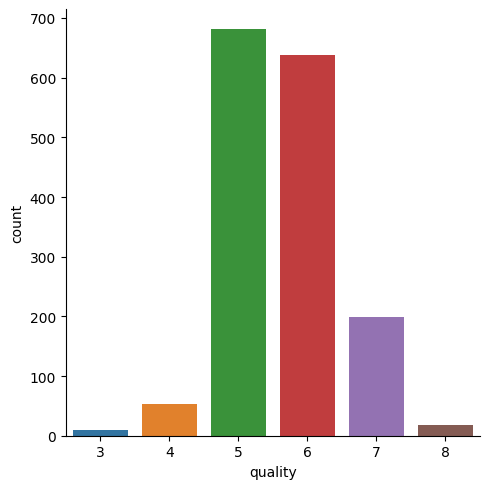

In [ ]:
sns.catplot(x='quality', data = data, kind = 'count') # compter le nombre d'instances de chauqe classe

Il est temps de voir les relations entre chaque composant (variables explicatives) et la qualité (variable target).

<Axes: >

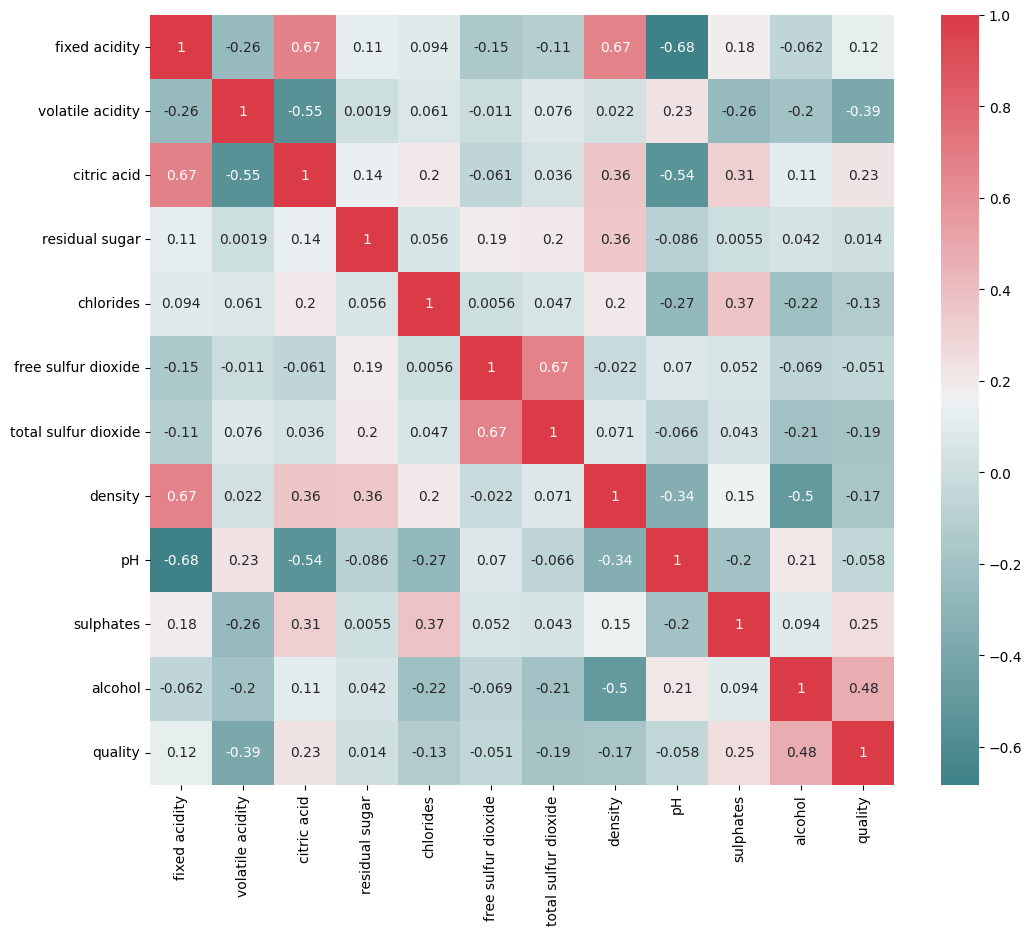

In [ ]:
#data.corr()
plt.figure(figsize=[12,10]) # agandir la fenetre d'affichage
sns.heatmap(data.corr(),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True)) 
# on plot le heatmap Pour vérifier la corrélation, 
# une méthode statistique qui trouve la liaison et la relation entre deux caractéristiques.


Dans un premier temps, la variable qui semble avoir une corrélation positive avec la qualité du vin, est l'alcohol.

---------------------------------------------

<Axes: title={'center': 'alcohol'}, xlabel='quality'>

<Figure size 1500x1000 with 0 Axes>

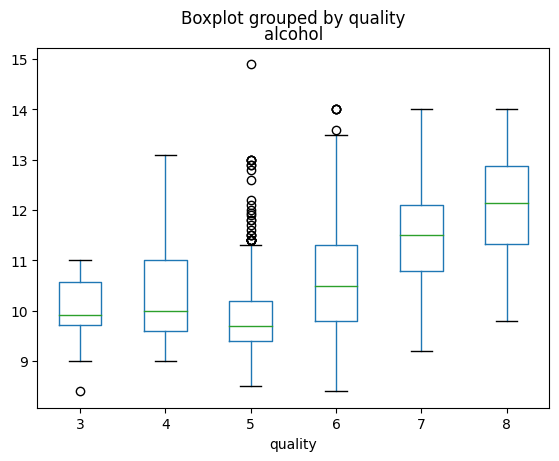

In [ ]:
fig = plt.figure(figsize=(15,10))
data.boxplot(by='quality', column=['alcohol'], grid=False) # la qualité vs l'alcohol 
# en d'autre terme quel effect peut avoir l'alcohol sur la qualité du vin.


Ce graphique indique la moyenne de l'alcool pour chaque qualité de vin, à partir de ce graphique, nous pouvons supposer qu'une relation entre la qualité et l'alcool est une corrélation positive et une non-linéarité. 
Comme vous pouvez le voir, l'alcool semble présenter la relation négative sur la qualité du vin 3, 4 et 5 alors qu'il présente une relation positive sur 5,6,7 et 8. Cela nous donne l'intuition que l'alcool fait un joli travail de prédiction mais ont un seuil déroutant et un chevauchement des données autour de la qualité 3, 4, 5 et 6.

---------------------------
Venons voir les autres Variables et comment réagissent-elles par rapport à la **qualité** du vin.

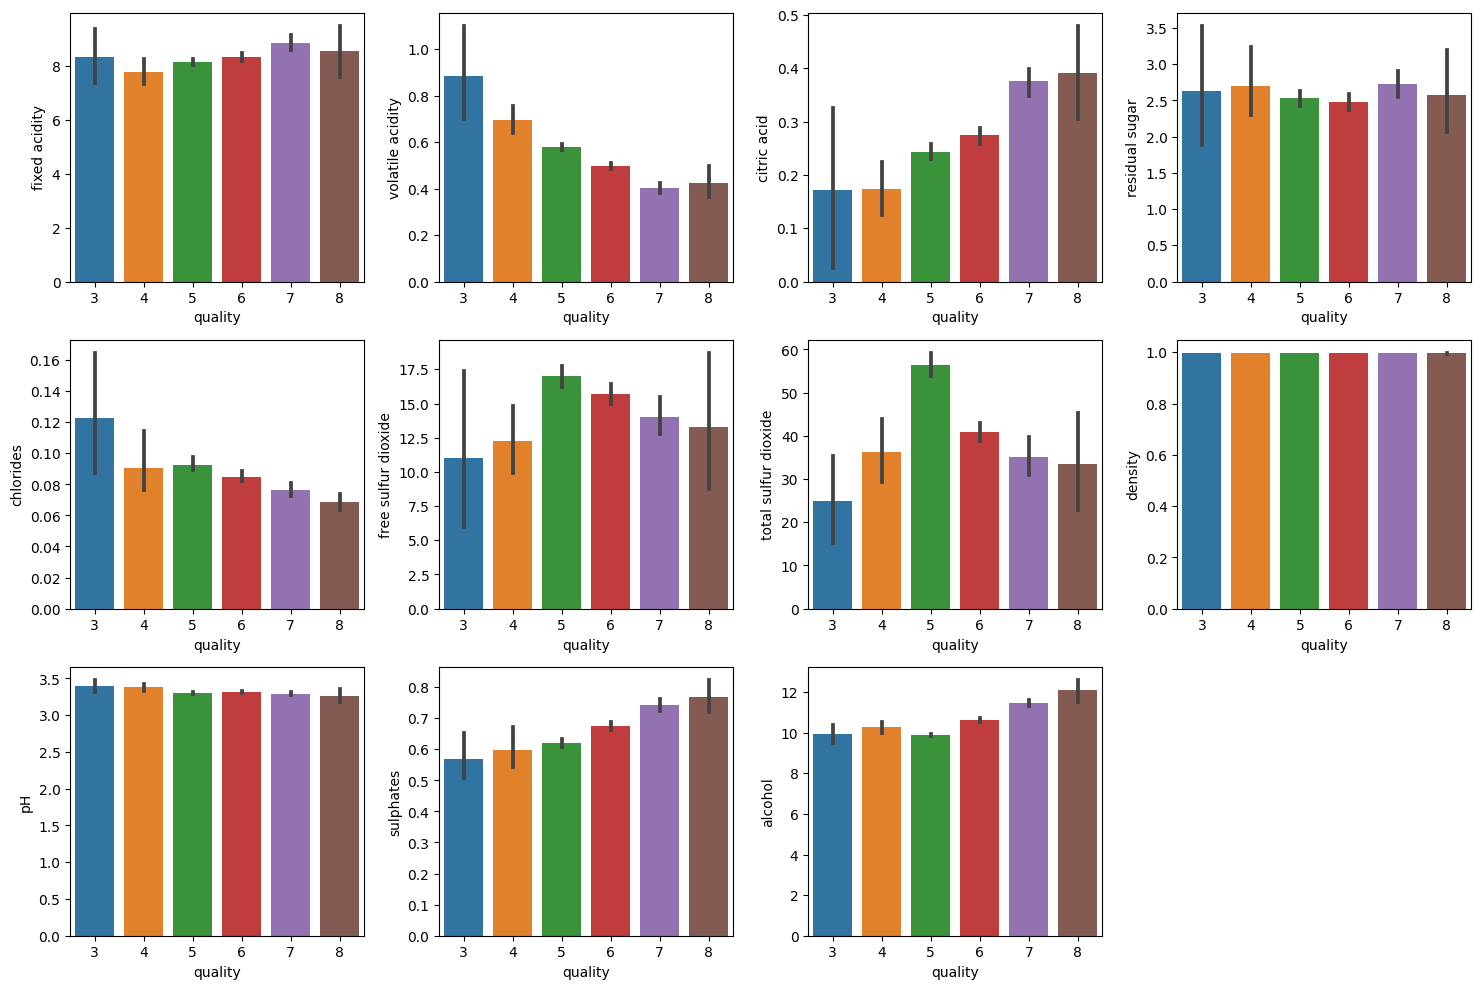

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=data)  # qualité vs fixed acidity
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=data) # qualité vs volatile acidity
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=data)    # qualité vs citric acid
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=data) # qualité vs residual sugar
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=data) # qualité vs chlorides
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=data) # qualité vs free sulfur dioxide
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=data) # qualité vs total sulfur dioxide
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=data) # qualité vs density
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=data) # qualité vs pH
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=data) # qualité vs sulphates
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=data) # qualité vs alcohol
plt.tight_layout()

À partir du graphe ci-dessus on observe que:

- La qualité est élevée lorsqu'il y'a moins d'acidité volatile.
- La qualité est élevée lorsque l'acide citrique est élevé.
- La qualité est élevée lorsqu'il y'a moins de chlorides.
- La qualité est élevée lorsque les Sulfates sont élévés.
- La qualité est élevée lorsque l'alcohol is élevé.

Par conséquent, il serait bon de garder ces variables (compostants) qui semblent avoir un effect direct sur la la qualité du vin autrement dit, qui expriment mieux la qualité du vin.

In [ ]:
# data.hist(bins=25,figsize=(10,10))


# Comment mieux exprimer la qualité

Dans le dataset (wine), nous observons que la qualité varie entre 3 et 8 [3-8] et c'est tout à fait normal, mais l'être-humain préfère la pécision et toujours avoir moins d'options pour mieux décider.

Ce n'est pas faux si nous procédons avec les mêmes classes et laissons les choses telles quelles, mais nous voulons bien répliquer le comportement de l'etre humain de tous les jours.

Donc l'idée consiste à regrouper ces classes de façon à avoir au moins 3 classes ou 2.

Explication:
Si nous optons pour 3 classes, cela peut être exprimer par les 3 classes suivantes : mauvais vin , moyen, bon.

Une 2eme possibilité : regrouper les classes de façon à avoir 2 classes : mauvais vin , Bon vin.

Nous avons opté pour la 2eme, car dans la vraie vie, un etre humain décide (en général) de façon binaire, et même si les modèle de machine learning sont capables de classifier et grouper des dizaines ou des milliers de classes et les traiter facilement, au final le modèle sera exposé à un être humain, donc l'objectif et de suivre un cheminement adapté à une solution qui sera projetée sur la vraie vie.

Pour ce faire, nous allons définir une fonction **qualitify** qui classe comme mauvais vin, tou ce qui est en-dessous de 7 et bon ce qui est au-dessus.

Cela se traduit par:

1 -> pour dire ceci est un bon vin.

2 -> pour dire que c'est du mauvais vin.

Remarque: 
le fait de dire que c'est du maivais vin ne veut pas dire concrètement mauvais mais dans ce contexte de classification le mot mauvais paraît le mieux approprié.


In [ ]:
# definir la fonction qualitify qui reclasse la qualité en deux (02) groupes seulement (mauvias, Bon) vin.
# si la qualité est égale ou supérieure à 7 on dit que ce vin est bon 
# sinon on dit que ce vin est mauvais.
def qualitify(quality): 
    if quality >= 7:
        return 1
    else:
        return 0


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data['quality'] = data['quality'].apply(qualitify)


In [ ]:
data.head() # nous allons jeter un coup d'oeil sur la colonne quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Allons voir maintenant, la nouvelle distibution des classe.

In [ ]:
data['quality'].value_counts()  # la nouvelle distibution des classes (0/1 ou mauvias/bon)

0    1382
1     217
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

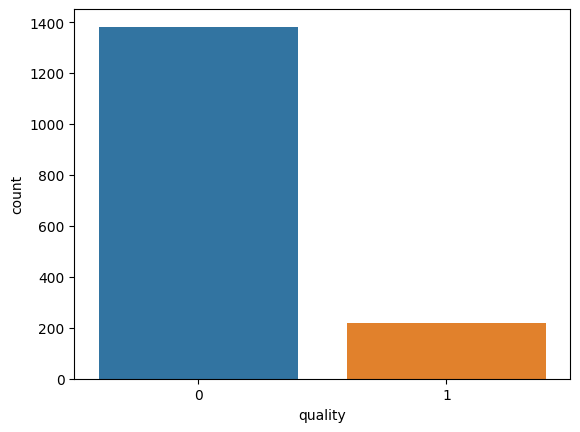

In [ ]:
# une illustration visuale sera toujour meilleure (même idée que celle du code de dessus )
sns.countplot(x = 'quality',data = data) 

In [ ]:
# pop la colonne quality et en même temps la stocker dans la var "target"
target = data.pop("quality") 


In [ ]:
target.shape # vérifier la dimension de la colonne target ( taget(1599,))

(1599,)

In [ ]:
# redimensionner cette colonne de façon à ce qu'elle soit de taille (1599, 1)
target = target.values.reshape(target.shape[0], 1)
target.shape 


(1599, 1)

Maintenant il est temps de supprimer les variables les moins importantes et garder que celles que nous avons discuter auparavent.

- La qualité est élevée lorsqu'il y'a moins d'acidité volatile.
- La qualité est élevée lorsque l'acide citrique est élevé.
- La qualité est élevée lorsqu'il y'a moins de chlorides.
- La qualité est élevée lorsque les Sulfates sont élévés.
- La qualité est élevée lorsque l'alcohol is élevé.

Donc garder:
- acidité volatile
- acide citrique
- chlorides
- Sulfates
- alcohol

In [ ]:
# supprimer les colonnes qui ne seront pas utiles via la fonction "drop"
data = data.drop(["fixed acidity", "residual sugar", "free sulfur dioxide", "total sulfur dioxide", "density", "pH"], axis = 1 )

In [ ]:
data # vérifier si les variables importantes sont bien présentes 

,volatile acidity,citric acid,chlorides,sulphates,alcohol
0,0.700,0.00,0.076,0.56,9.4
1,0.880,0.00,0.098,0.68,9.8
2,0.760,0.04,0.092,0.65,9.8
3,0.280,0.56,0.075,0.58,9.8
4,0.700,0.00,0.076,0.56,9.4
...,...,...,...,...,...
1594,0.600,0.08,0.090,0.58,10.5
1595,0.550,0.10,0.062,0.76,11.2
1596,0.510,0.13,0.076,0.75,11.0
1597,0.645,0.12,0.075,0.71,10.2


In [ ]:
from sklearn.model_selection import train_test_split # importer le train_test_split 

# split le dataset en 2 
# 80 % pour l'entrainement et 20% pour le test
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size =0.20,random_state=42)

# Normalisation 
La normalisation est une technique souvent appliquée dans le cadre de la préparation des données pour l'apprentissage automatique. L'objectif de la normalisation est de modifier les valeurs des colonnes numériques dans l'ensemble de données pour utiliser une échelle commune, sans déformer les différences dans les plages de valeurs ni perdre d'informations. La normalisation est également requise pour certains algorithmes afin de modéliser correctement les données.

### *explication
Par exemple, supposons que votre ensemble de données d'entrée contienne une colonne avec des valeurs comprises entre 0 et 1, et une autre colonne avec des valeurs comprises entre 10 000 et 100 000. 

La grande différence dans l'échelle des nombres peut entraîner des problèmes lorsque vous essayez de combiner les valeurs en tant qu'entités lors de la modélisation.

#### Source (Miscrosoft)
https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/normalize-data


In [ ]:
# sns.pairplot(X_train)

In [ ]:
from sklearn.preprocessing import StandardScaler # importer StandardScaler
scaler = StandardScaler() # Instancier le scaler 
X_train = scaler.fit_transform(X_train) # le Scaler est appliqué sur le dataset Train
X_test = scaler.transform(X_test) # le Scaler est appliqué sur le dataset Test

# Modèle - 1 - SVM ( Support Vector Machines)

Pour notre premier modèle nous allons utiliser un algorithme de classification Supervisé, qui est le SVM ( Support Vector Machine.

Les machines à vecteurs de support (SVM) sont une méthode d'apprentissage automatique populaire pour la classification,et c'est le cas dans notre exemple, qui consiste à prédire la classe d'un objet en fonction de ses caractéristiques.


Les machines à vecteurs de support (SVM) fonctionnent en cherchant à maximiser la marge entre les classes de données. La marge est la distance entre la frontière de décision qui sépare les classes et les points de données les plus proches de chaque classe.

Les SVM cherchent à trouver la frontière de décision qui maximise la marge, tout en respectant la contrainte que tous les points de données soient correctement classés




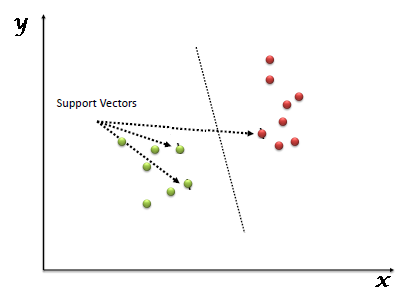

Puisque le problème que nous étudions est un problème de classification, cet algorithme semble approprié, Allons appliquer cela ...

Heuresement avec sckit-learn tout cela se fait en quelques lignes.

- Importer le model de classification
- instancier le modèle 
- appliquer le modèle sur le dataset d'entrainement
- tester le modèle sur le dataset de test


les SVM utilisent une fonction de noyau pour transformer les données en un espace de dimension supérieure où les classes peuvent être séparées par une frontière linéaire.

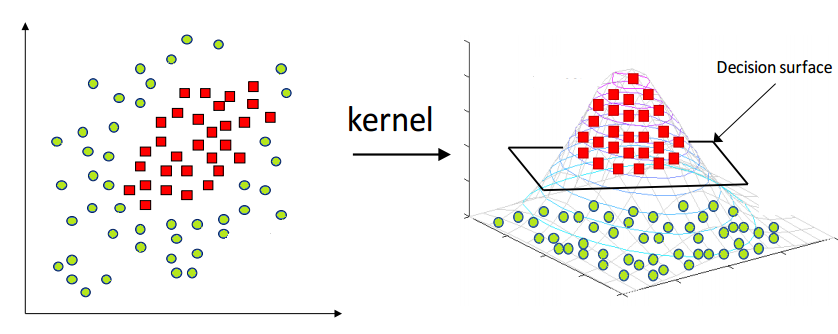

In [ ]:
from sklearn.svm import SVC # importer SVC (Support Vector Classification)


# instancier le modèle avec un noyau  (Radial Basis Function) rbf
# C est le paramètre de régularisation
svm_model = SVC(C=1, kernel='rbf') 

# appliquer le modèle sur le train dataset
svm_model.fit(X_train, np.ravel(y_train))

SVC(C=1)

Maintenant que notre modèle est prêt il va falloir vérifier le taux de justesse de ce dernier, en d'autres termes à quel poit ce modèle est capable de prédire la vraie classe.

Pour ce faire nous allons tracer la courbe de justesse et celle de la fonction de perte pour voir à quel moement le modèle commence à avoir de bons résultat et à quel point il commence à surapprendre.

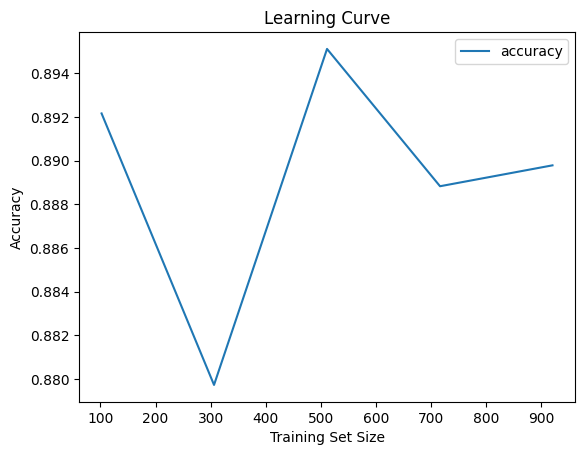

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


# definir le dataset ( X, Y)
X = X_train
y = np.ravel(y_train,order="C")

# Calculer le taux d'apprentiqqage
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

# Plot / tracer la courbe d'apprentiqqage
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# from mlxtend.plotting import plot_decision_regions

# Plotting the decision boundary
#plot_decision_regions(X_test, y_test, clf = svm_model, legend = 2)
#plt.title("Decision boundary using SVC (Test)")
#plt.xlabel("mean_perimeter")
#plt.ylabel("mean_texture");

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy_score : une fonction qui calcule le taux de précision d'un modèle de classification
# confusion_matrix : une fonction qui calcule la matrice de confusion d'un modèle de classification.

# classification_report : une fonction qui calcule les mesures 
# de performance pour chaque classe dans un modèle de classification

svm_y_pred = svm_model.predict(X_test) # appliquer le modèle sur le dataset test.

# calcule le taux de précision du modèle en comparant les étiquettes réelles y_test aux prédictions du modèle svm_y_pred.
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))

# calcule la matrice de confusion du modèle en comparant les étiquettes réelles y_test aux prédictions du modèle svm_y_pred.
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))

# calcule un rapport de classification détaillé pour chaque classe dans le modèle 
# en comparant les étiquettes réelles y_test aux prédictions du modèle svm_y_pred
print('Classification Report:\n', classification_report(y_test, svm_y_pred))


Accuracy Score: 0.85625
Confusion Matrix:
 [[264   9]
 [ 37  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320



Le modèle SVM est capable de prédire à 85.62% la classe correcte du dataset de Test, ce qui est pas loin du résultat obtenu avec le dataset Train

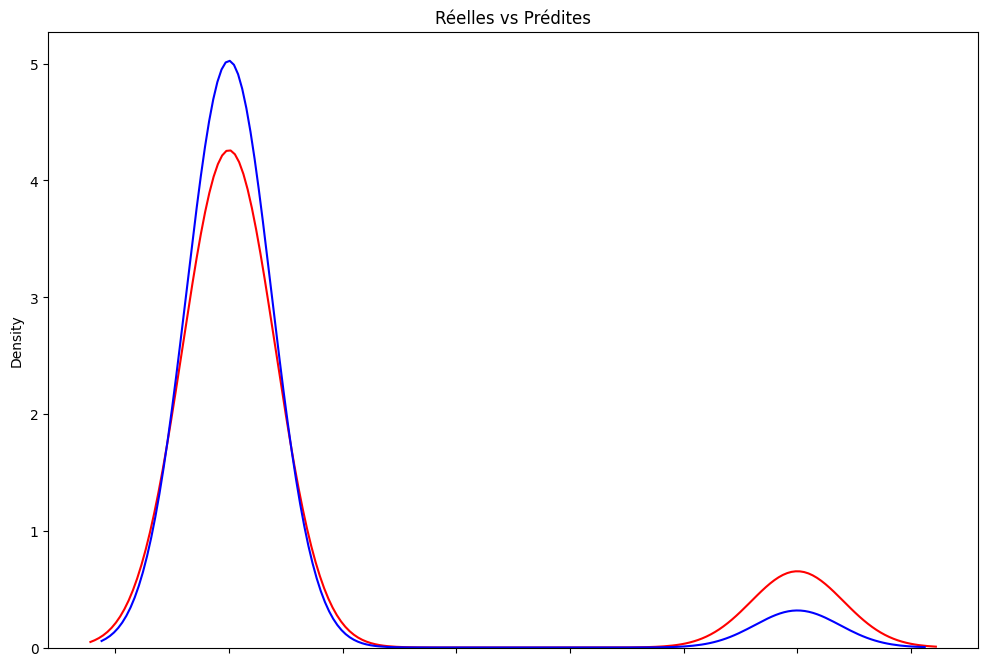

In [ ]:

import warnings # ignorer les warinings de deprecated  de seaborn 
warnings.filterwarnings("ignore")


# ce graphique représente les données réelles et celles predites par le modèle
# cela permet de comparer visualement les valeurs des deux

plt.figure(figsize=(12, 8))


ax1 = sns.distplot(y_train, hist=False, color="r", label="Valeurs réelles")
sns.distplot(svm_y_pred, hist=False, color="b", label="Valeurs prédites" )
ax1.set(xticklabels=[])
#ax1.set(yticklabels=[])

plt.title('Réelles vs Prédites')

plt.show()
plt.close()



## Discuter les résultats obtenus:

**Accuracy Score: 0.85625** : Le taux de précision du modèle est de 85,625%, ce qui signifie que le modèle a correctement prédit la classe de 85,625% des échantillons de l'ensemble de test.

**Confusion Matrix**: La matrice de confusion montre le nombre de vrais positifs (264), de faux positifs (9), de faux négatifs (37) et de vrais négatifs (10) pour les deux classes (0 et 1).

**Classification Report** : Le rapport de classification fournit les mesures de précision, de rappel et de score F1 pour chaque classe (0 et 1), ainsi que la moyenne pondérée de ces mesures pour l'ensemble de test.

**precision** mesure le nombre de vrais positifs par rapport à tous les échantillons prévus comme positifs. Pour la classe 0, la précision est de 88%, ce qui signifie que 88% des échantillons prédits comme positifs sont réellement positifs. Pour la classe 1, la précision est de 53%, ce qui signifie que 53% des échantillons prédits comme positifs sont réellement positifs.

**recall** mesure le nombre de vrais positifs par rapport à tous les échantillons réellement positifs. Pour la classe 0, le rappel est de 97%, ce qui signifie que 97% des échantillons réellement positifs ont été correctement identifiés comme positifs. Pour la classe 1, le rappel est de 21%, ce qui signifie que seulement 21% des échantillons réellement positifs ont été correctement identifiés comme positifs.

**f1-score** est la moyenne harmonique de la précision et du rappel. Il est utilisé pour mesurer la qualité globale de la prédiction pour chaque classe. Pour la classe 0, le score f1 est de 92%. Pour la classe 1, le score f1 est de 30%.

**support** est le nombre d'échantillons réels pour chaque classe.

**macro avg** est la moyenne des métriques de précision, de rappel et de score F1 pour les deux classes.

**weighted avg** est la moyenne pondérée des métriques de précision, de rappel et de score F1 pour les deux classes, pondérée par le nombre d'échantillons réels de chaque classe.

le résultat le plus important est **85.625 % **, bien que ce résultat semble éminent et notre modèle arrive à prédire la classe du vin avec 85.625 %, dans le domaine du machine learning, nous avons toujours la possibilité de faire mieux jusqu'ç certain point bien sûr ( à ne pas tomber dans le piège du surapprentissage)


Dans le graphe affiché ci-dessus, il est clair que le résultat prédit par le modèle sur le dataset test suit la même allure du dataset réel, forcément nous remarquons quelques zones où le modèle s'éloigne de la réalité mais cela reste un point fort car cela prouve que le modèle n'est pas tombé dans le piège de surapprentissage.

Prochainement, Nous pouvons changer quelques hyperparamèrtes afin d'avoir de mielleurs résultats ( ce n'est pas toujours possible)

Pour ce faire nous allons chnager ces hyper-params, par exemple:
- changer la fonction du noyau - Kernel
- Paramètre de régularisation - C

mais faire cela manuellement n'est pas très pratique, pour cela nous allons faire appel à GridSearch qui combine tous les hyper-params d'un modèle et au final on choisit celui qui donne le meilleur résulat.

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV


# définir les hyperparamètres à tester dans la grille de recherche
svm_param_grid = {'C':[0.01, 0.1, 1, 10, 100], 
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.001, 0.01, 0.1, 1, 10]}

# définir la méthode de validation croisée utilisée 
# pour évaluer les performances du modèle pour chaque combinaison d'hyperparamètres
# dans ce cas c'est "StratifiedKFold" 
svm_cv = StratifiedKFold(n_splits=5)

# GridSearchCV  effectue la recherche de grille 
# avec la méthode de validation croisée et la grille de paramètres définie
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring='accuracy')

# est appelé pour exécuter la recherche de grille. Il ajuste automatiquement le modèle SVM 
# avec chaque combinaison d'hyperparamètres et évalue les performances à l'aide 
# de la méthode de validation croisée et la métrique de précision
svm_grid.fit(X_train, np.ravel(y_train,order="C"))



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
# Renvoie un dictionnaire contenant les hyperparamètres optimaux pour le modèle SVM
print('SVM best Params:', svm_grid.best_params_)
# renvoie la performance moyenne du modèle sur la méthode de validation croisée avec les hyperparamètres optimaux
print('SVM best Score:', svm_grid.best_score_)

SVM best Params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVM best Score: 0.8944607843137256


Il paraît que le paramétrage a bien fonctionné, nous avons obtenu un résultat plus élevé que celui d'avant avec **89.44 %**

avec les parametres suivants:
'C': 1, 'gamma': 1, 'kernel': 'rbf'

Au final, ce mèdele semble capable à prédire la classe du vin à 89.44%. sur le dataset Train 

Allons voir maintenant, sa performance sur le dataset Test


In [ ]:
# appliquer le meilleur modèle de girdsearch sur le dataset test
svm_y_pred = svm_grid.predict(X_test) 

# afficher l'accuracy, la matrice de confusion
print('Accuracy:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy: 0.875
Confusion Matrix:
 [[265   8]
 [ 32  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.65      0.32      0.43        47

    accuracy                           0.88       320
   macro avg       0.77      0.64      0.68       320
weighted avg       0.86      0.88      0.86       320



nous remarquons une légère dégradation avec un score de **87.5%**, mais cela reste normale car un modèle qui s'ent entrainé sur un dataset ne sera pas capable classifier tout de façon juste.

Mais la question est:

est-il possible de faire mieux ? 

# Modèle - 2 - Random Forest 

Pour voir si cela Possible ou non, nous allons entrainer un modèle mais en utilisant un algorithme différent, donc nous avons choisi **Random Forest** ou les forets aléatoires.

Les forêts aléatoires combinent plusieurs arbres de décision, chacun étant entraîné sur une sous-section aléatoire des données, et utilisent un vote majoritaire pour prendre la décision finale.

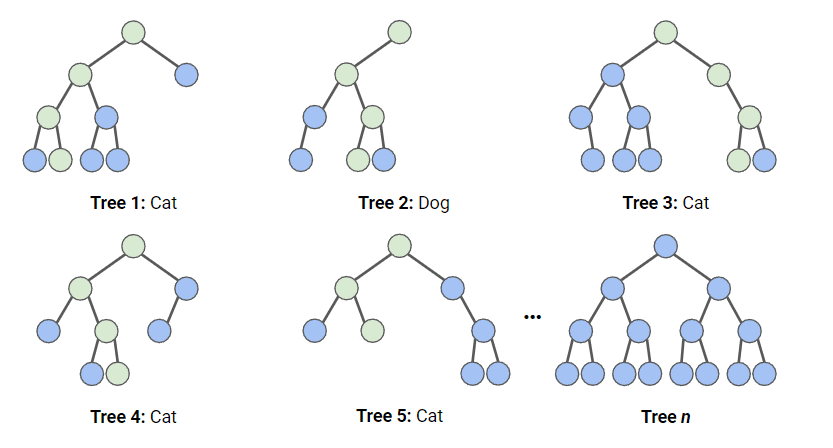

Random Forest Classifier est essentiellement un ensemble de classificateurs d'arbres de décision qui se combinent pour donner le vote majoritaire en faveur d'une classe. 
Nous allons entraîner un classificateur Random Forest à l'aide de la bibliothèque scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 'n_estimators' spécifie le nombre d'arbres de décision (500)
# qui seront utilisés pour former le classificateur Random Forest.
rf_model = RandomForestClassifier(n_estimators=500) 

# le modele commence l'entrainement
# appliquer le modèle sur le train dataset 
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Observons la précision du modèle Random Forest sur l'ensemble de données de test :

In [ ]:
rf_y_pred = rf_model.predict(X_test) # appliquer le modèle sur le test dataset 

# accuracy : à quel point le modèle etait capable de prédire les bonnes classes
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred)) 

Accuracy Score: 0.890625


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy_score : une fonction qui calcule le taux de précision d'un modèle de classification
# confusion_matrix : une fonction qui calcule la matrice de confusion d'un modèle de classification.

# classification_report : une fonction qui calcule les mesures 
# de performance pour chaque classe dans un modèle de classification

rf_y_pred = svm_model.predict(X_test) # appliquer le modèle sur le dataset test.

# calcule le taux de précision du modèle en comparant les étiquettes réelles y_test aux prédictions du modèle svm_y_pred.
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))

# calcule la matrice de confusion du modèle en comparant les étiquettes réelles y_test aux prédictions du modèle svm_y_pred.
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))

# calcule un rapport de classification détaillé pour chaque classe dans le modèle 
# en comparant les étiquettes réelles y_test aux prédictions du modèle svm_y_pred
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuracy Score: 0.85625
Confusion Matrix:
 [[264   9]
 [ 37  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320



Un score de 89.06 sur le dataset d'entrainement et 85.62 sur celui du test, ce qui fait une dégradation de 4 points

In [ ]:
# définir les hyperparamètres à tester dans la grille de recherche

rf_param_grid = {'max_samples': [0.1, 0.2, 0.3, 0.4],
                'max_features': [5, 6, 7],
                'n_estimators' :[50, 100, 500, 1000],
                'max_depth': [10, 11, 12]
                }

rf_cv = StratifiedKFold(n_splits=5)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=rf_cv)
rf_grid.fit(X_train, np.ravel(y_train,order="C"))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12], 'max_features': [5, 6, 7],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [50, 100, 500, 1000]})

In [ ]:
print('RF best Parameters:', rf_grid.best_estimator_) # afficher le meilleur Classifier 
print('RF best Score:', rf_grid.best_score_) # afficher son score ( accuracy / justess)

RF best Parameters: RandomForestClassifier(max_depth=10, max_features=7, max_samples=0.1,
                       n_estimators=50)
RF best Score: 0.893685661764706


Donc nous avons un modèle généré via le gridsearch avec un score de 89.36 %

Maintenant que le meilleur modèle est choisi, il est temps d'aller tester sur le dataset test.

In [ ]:

# appliquer le meilleur modèle de girdsearch sur le dataset test
rf_y_pred = rf_grid.predict(X_test) 

# afficher l'accuracy, la matrice de confusion
print('Accuracy:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))


Accuracy: 0.871875
Confusion Matrix:
 [[264   9]
 [ 32  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.62      0.32      0.42        47

    accuracy                           0.87       320
   macro avg       0.76      0.64      0.68       320
weighted avg       0.85      0.87      0.85       320



Comme expliquer dans le premier modèle, le résultat qui nous intéresse le plus est celui de la justesst (accuracy), qui vaut 86,56% ce qui veut dire que ce modèle est capable de prédire la vraie classe à 87,18 % ce qui est un pourcentage élevé  pour le moment sur le dataset Test mais pas assez pour dire que ce modèle est bien meilleur.

# Modèle -3-  Logisitc Regression

Pour un 3eme Modèle, nous allons utiliser la regression logistique ( Logistic Regression ) 

Ce type de modèle statistique (également appelé modèle logit) est souvent utilisé pour la classification et l'analyse prédictive. La régression logistique estime la probabilité qu'un événement se produise, tel que le cas un **bon ou mauvais vin**, sur la base d'un ensemble de données donné de variables indépendantes. Comme le résultat est une probabilité, la variable dépendante est bornée entre 0 et 1.

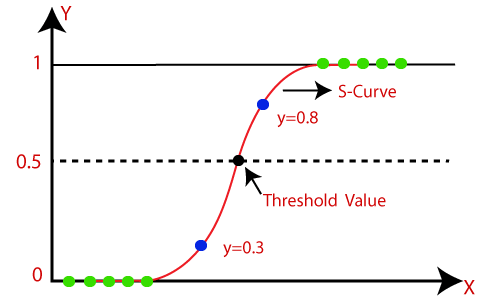

Donc nous allons utiliser cette aproche, considéré comme un bon modèle de classification qui est le cas présent.


In [ ]:

# importer les bib les package nécessaire pour la régression logisitique
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # importer les metrics ( accuracy score)

In [ ]:
# creer le modèle RL
lr = LogisticRegression(random_state=40)

# commencer à entrainer le modèle sur le dataset train 
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [ ]:

# afficher les scores (accuracy) du modèle sur le dataset train
train_accuracy = lr.score(X_train, y_train)

# afficher les scores (accuracy) du modèle sur le dataset train
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.88
Accuracy in Test  Group   : 0.86


Bien que les résultats semblent ... acceptables, (88% sur le dataset Train et 86% sur le dataset Test) nous allons appliquer encore une fois un gridsearch pour voir si un modèle de type regression logistique existe et qu'il soit meilleur que celui obtenu.

In [ ]:
from sklearn.pipeline import make_pipeline # importer make_pipeline

# creer un pipline 
pipelineLR = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))

# Creer la grille de parameteres
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
}]

# Creer une instance de la GridSearch Cross-validation 
gsLR = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)

# entrainer le Classifier sur le dataset Train avec une regression logistique
gsLR = gsLR.fit(X_train, np.ravel(y_train))

# Affihcer le score du meilleur modèle
print(gsLR.best_score_)

# afficher les meilleurs paramatres
print(gsLR.best_params_)

# afficher le score du meilleur modèle sur le dataset test
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_test, y_test))

0.8803887795275591
{'logisticregression__C': 0.05}
Test accuracy: 0.853


Même avec un gridsearch le modèle (regression logistique) obtenu au début semble légèrment mielleur que celui obtenu par le gridsearch

# Modèle -4- Neural Network (MLP)

Un réseau de neurones est un modèle d'apprentissage automatique qui est bien adapté à la classification car il peut apprendre des représentations discriminantes à partir des données d'entrée et produire une sortie qui peut être interprétée comme une prédiction de la classe cible.
La fonction de perte binary_crossentropy est couramment utilisée avec un sigmoid à la couche de sortie d'un réseau de neurones lorsqu'on travaille sur des problèmes de classification binaire. Elle permet de mesurer la différence entre la sortie du réseau et la valeur attendue pour chaque exemple d'entraînement.

En outre, les réseaux de neurones peuvent capturer des relations non linéaires complexes entre les caractéristiques d'entrée et les classes cibles, ce qui peut être particulièrement important dans les problèmes de classification qui impliquent des relations non linéaires.



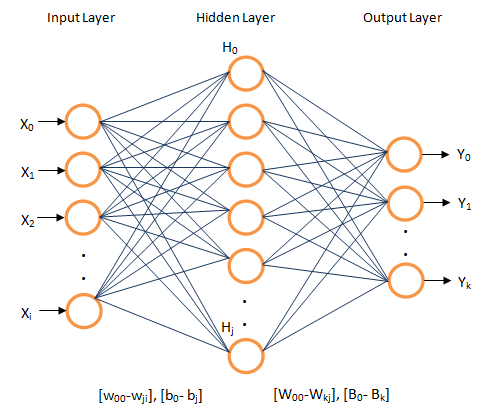

In [ ]:
import tensorflow as tf # importer tensorflow 


# creation du modèle MLP ( Multi Layer Perceptron)
def MLPmodel():
  model = tf.keras.Sequential() # preciser que c'est un modèle "sequential"

  # ajouter la 1ere couche en precisant le input_shape qui aura une taille de 5
  # et 128 neurons pour la 1ere couche 
  # et une fonction d'activation "relu"
  model.add(tf.keras.layers.Dense(units=128, activation='relu',input_shape=(5,)))

  # un dropout pour elaguer queulques neurons afin d'éviter
  # que le modèle surapprenne 
  model.add(tf.keras.layers.Dropout(0.2))

  #une couche cachée qui contient 64 neurons avec un fonction d'activarion "relu"
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))

  # Un autre dropout de 20% après la la couche cachée pour le même motif
  model.add(tf.keras.layers.Dropout(0.2))

  # une derniere couche, celle de la sortie qui a un seul neuron car nous travaillons
  # sur un problème de classification binaire.
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # on compile le modèle avec un optimizer "adam" et une finction de perte 
  # binary cross entropy qui fonctionne très bien avec les problèmes de 
  # classification binaire 
  # et une metric = accuracy pour voir à quel point le modèle est capable 
  # de predire la vraie classification 
  model.compile( optimizer="adam", loss= "binary_crossentropy" ,metrics=['accuracy'])
  return model



Le sigmoid est utilisé à la couche de sortie pour transformer la sortie continue du réseau en une probabilité dans l'intervalle [0,1], qui peut être interprétée comme la probabilité d'appartenance à la classe positive. La fonction de perte binary_crossentropy est alors utilisée pour calculer la perte en comparant cette probabilité à la valeur réelle de la classe.

Plus précisément, la binary_crossentropy mesure l'entropie croisée entre la distribution de probabilité prédite par le modèle et la distribution de probabilité réelle des classes. Elle est particulièrement adaptée à la classification binaire car elle peut être formulée de manière simple et efficace.

- Optimisateur : **Adam** (Adaptive Moment Estimation)
C'est un optimiseur adaptatif qui combine les avantages du momentum et de l'adaptation du taux d'apprentissage. Il est couramment utilisé en raison de sa convergence rapide et de sa capacité à gérer des taux d'apprentissage différents pour chaque paramètre. 
- fonction de perte (loss) : **Categorical Cross-Entropy** (Entropie croisée catégorielle est une fonction de perte couramment utilisée dans les réseaux de neurones pour la classification binaire. Elle mesure la différence entre la sortie prédite par le modèle et la valeur réelle de la classe pour chaque exemple d'entraînement.

In [ ]:
model_MPL = MLPmodel() # instancier le modèle 

# commencer l'entrainement du modèle avec 5 epoch et un batch-size 32
trace = model_MPL.fit(X_train , y_train, 
                        epochs=5, batch_size = 32)

Epoch 1/5
40/40 [==============================] - 1s 3ms/step - loss: 0.4202 - accuracy: 0.8600
Epoch 2/5
40/40 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.8733
Epoch 3/5
40/40 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.8835
Epoch 4/5
40/40 [==============================] - 0s 3ms/step - loss: 0.2911 - accuracy: 0.8788
Epoch 5/5
40/40 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.8812


Bien que nous avons utilisé un réseau de neurons, ce qui est considéré comme une arme fatale dans le domaine du machine learning et Deep learning, les résultats restent légèrement moins meilleurs qu'un modèle comme le SVM

In [ ]:
def plot_progress(hist_name, name, size):
    fig2, ax2 = plt.subplots(figsize = size)
    loss_curve = hist_name.history[name]
    plt.plot(loss_curve, label="Train")
    plt.title(name)
    plt.show() 
    return

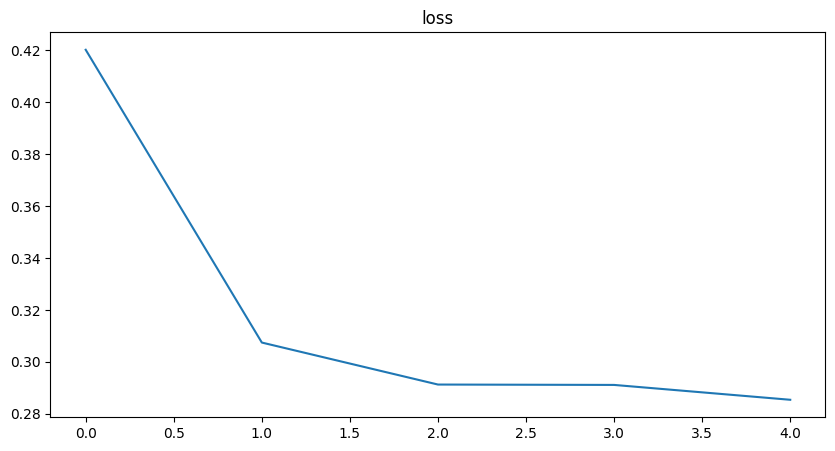

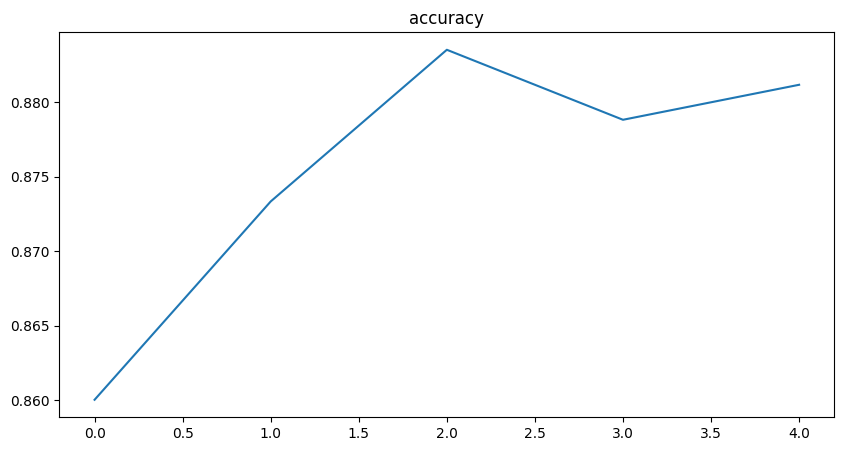

In [ ]:
plot_progress(trace, 'loss', [10,5])
plot_progress(trace, 'accuracy', [10,5])

le graphe de la justesse montre qu'à partir de la 1ere epoch le modèle commence à apprendre et s'améliore et cela continue jusqu'à la 3eme epoch où la courbe semble descendre un peu, donc cela veut dire que le modèle commence à surapprendre et c'est à ce point qu'il faut l'arréter.

Cela est exprimer aussi avec le graphe de la fonction de perte, il est clair que la fonction de perte se stabilise just après la 3eme epoch.

Maintenant nous allons evaluer ce modèle sur le dataset Test 

In [ ]:
# tester le modèle sur le dataset Test et retourner les évaluation ( Justesse/ Fonc Perte)
loss, acc = model_MPL.evaluate(X_test, y_test, verbose=2)

# afficher l'accuraccy (justess) et la fonction de perte ( loss)
print("Trained model, accuracy: {:5.2f}%".format(100*acc))
model_MPL.summary()

10/10 - 0s - loss: 0.2720 - accuracy: 0.8562 - 132ms/epoch - 13ms/step
Trained model, accuracy: 85.62%
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               768       
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_______________

Ce Modèle de deep learning ( MLP Multi layer perceptron ) reste derriere avec un score de 85.62%.

# Comparaison 

les 4 modèles SVM, randomforest, logistic regression et le réseaux de neurons ont tous un score qui varie entre 85% et 88%, certes une justesse de telle valeur n'est pas négligeable, mais dans le domaine du machine learning pour dire qu'un modèle est bien meilleur qu'un autre ou bien ce modèle arrive à donner les bonnes classes, il faut que sa justesse dépasse le seuil de 93%, car tous ces modèles avec un score de 86% laissent une marge considérable pour ne pas prédire la bonne classe.

- Cela s'explique par le fait que le dataset utilisé pour l'entrainement reste un petit dataset qui contient peu de données et cela va certainement affecter le modèle et sa capacité de trouver les bonnes caractéristiques afin de dire que cet objet apartienne à telle ou à telle classe.

- Il se peut aussi que la méthode choisie de prétraitement ne soit pas la bonne, même si cette derniere nous paraît la plus logique et la plus proche de la réalité.

- il se peut aussi que le dataset ne soit pas représentatif, autrement dire que cetaines classes sont majoritaires par rapport aux autres et cela peut influencer le modèle à toujours préférer et choisir certaines classes que d'autres.


Un dicton dans le domaine du machine learning ( dont je me rappele pas l'auteur) dit que le plus important ce n'est pas à quel point le modèle choisi soit à la mode ou semble sophistiqué, mais plutôt ce qui est important est la nature des données et comment sont elles traitées.


Cela conclut notre étude sur le dataset **wine.csv**

----

# Convertir le notebook en PDF

il semble que la conversion du notebook en PDF, ne garde pas la forme de ce fichier et certaines figures seront découpées, ce qui rend la lecture et l'interprétation impossible.

Donc Nous allons tout simplement convertir ce fichier à l'aide de **jupter nbconvet** et le package **xetex**

source 
[vidéo sur youtube](https://www.youtube.com/watch?v=-Ti9Mm21uVc)

In [ ]:
!apt-get update

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


In [ ]:
!jupyter nbconvert HUPI_ML_Project_wine_FVX.ipynb --to pdf


[NbConvertApp] Converting notebook HUPI_ML_Project_wine_FVX.ipynb to pdf
[NbConvertApp] Support files will be in HUPI_ML_Project_wine_FVX_files/
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Making directory ./HUPI_ML_Project_wine_FVX_files
[NbConvertApp] Writing 114995 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most 

In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks'

# Bonne journée à vous 